# Sentiment Analysis - Rule Based

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv("news.csv",usecols=["clean_text","news_category"])
df.head()

,news_category,clean_text
0,technology,oppo reno pro g bokeh flare portrait video sal...
1,technology,oppo reno pro g bokeh flare portrait video go ...
2,technology,pegasus use horrible human right abuse must st...
3,technology,zoom buy five billion large ever acquisition z...
4,technology,form illegal spying impossible india minister ...


In [44]:
df.shape

(75, 2)

# 1. Sentiment analysis using TextBlob

In [46]:
!pip install TextBlob

In [47]:
from textblob import TextBlob

In [48]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df['clean_text']]
sentiment_scores_tb[0:5]
print(len(sentiment_scores_tb))

75


In [49]:
df["Sentiment_score_textb"]=sentiment_scores_tb

In [50]:
df.head()

,news_category,clean_text,Sentiment_score_textb
0,technology,oppo reno pro g bokeh flare portrait video sal...,0.250
1,technology,oppo reno pro g bokeh flare portrait video go ...,0.077
2,technology,pegasus use horrible human right abuse must st...,-0.254
3,technology,zoom buy five billion large ever acquisition z...,-0.024
4,technology,form illegal spying impossible india minister ...,-0.299


In [51]:
df["Sentiment_score_textb"][0]

0.25

In [52]:
df["senti_labels"]="dummy"
for i in range(75):
    if df["Sentiment_score_textb"][i]>0:
        df.iloc[i,3]="Positive"
    elif df["Sentiment_score_textb"][i]<0:
        df.iloc[i,3]="Negative"
    else:
        df.iloc[i,3]="Neutral"

In [53]:
df.head()

,news_category,clean_text,Sentiment_score_textb,senti_labels
0,technology,oppo reno pro g bokeh flare portrait video sal...,0.250,Positive
1,technology,oppo reno pro g bokeh flare portrait video go ...,0.077,Positive
2,technology,pegasus use horrible human right abuse must st...,-0.254,Negative
3,technology,zoom buy five billion large ever acquisition z...,-0.024,Negative
4,technology,form illegal spying impossible india minister ...,-0.299,Negative


In [54]:
df.head(1)

,news_category,clean_text,Sentiment_score_textb,senti_labels
0,technology,oppo reno pro g bokeh flare portrait video sal...,0.25,Positive


In [57]:
df.senti_labels.value_counts()

Positive    44
Negative    23
Neutral      8
Name: senti_labels, dtype: int64

In [58]:
df.Sentiment_score_textb.describe()

count    75.000000
mean      0.046493
std       0.194805
min      -0.456000
25%      -0.035500
50%       0.033000
75%       0.150000
max       0.667000
Name: Sentiment_score_textb, dtype: float64

<AxesSubplot:>

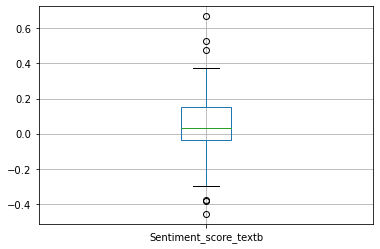

In [73]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Sentiment_score_textb'}>]],
      dtype=object)

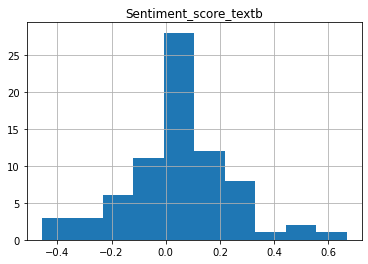

In [74]:
df.hist()

In [61]:
df[df["Sentiment_score_textb"]==df["Sentiment_score_textb"].max()]

,news_category,clean_text,Sentiment_score_textb,senti_labels
8,technology,no substance pegasus allegation attempt malign...,0.667,Positive


In [70]:
df[df["Sentiment_score_textb"]==df["Sentiment_score_textb"].max()]["clean_text"].values[0]

'no substance pegasus allegation attempt malign india minister no substance sensational report pegasus spyware use snoop journalist minister activist india minister ashwini vaishnaw say monday say report appear day monsoon session parliament ca nt coincidence report attempt malign indian democracy well establish institution add'

In [71]:
df[df["Sentiment_score_textb"]==df["Sentiment_score_textb"].min()]["clean_text"].values[0]

'google fire exec say no long hate jews linkedin post google fire amr awadallah developer relation vp google cloud day publish linkedin manifesto israeli palestinian relation admit use hate jews google employee reportedly object describe jews express concern past belief awadallah say piece promote tolerance understanding'

In [75]:
df.head()

,news_category,clean_text,Sentiment_score_textb,senti_labels
0,technology,oppo reno pro g bokeh flare portrait video sal...,0.250,Positive
1,technology,oppo reno pro g bokeh flare portrait video go ...,0.077,Positive
2,technology,pegasus use horrible human right abuse must st...,-0.254,Negative
3,technology,zoom buy five billion large ever acquisition z...,-0.024,Negative
4,technology,form illegal spying impossible india minister ...,-0.299,Negative


In [84]:
a=df.groupby(["news_category","senti_labels"])["senti_labels"].count()
a=pd.DataFrame(a)
a.columns=["count of senti labels"]
a

count of senti labels
news_category senti_labels                       
sports        Negative                          6
              Neutral                           1
              Positive                         18
technology    Negative                          7
              Neutral                           3
              Positive                         15
world         Negative                         10
              Neutral                           4
              Positive                         11

# 2. Sentiment Analysis using VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [129]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [87]:
for i,x in enumerate(df['clean_text']):
    print('Sentence',i,':',analyzer.polarity_scores(x))

Sentence 0 : {'neg': 0.044, 'neu': 0.907, 'pos': 0.048, 'compound': 0.0516}
Sentence 1 : {'neg': 0.046, 'neu': 0.907, 'pos': 0.046, 'compound': 0.0}
Sentence 2 : {'neg': 0.357, 'neu': 0.608, 'pos': 0.034, 'compound': -0.967}
Sentence 3 : {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.4939}
Sentence 4 : {'neg': 0.136, 'neu': 0.734, 'pos': 0.13, 'compound': -0.3182}
Sentence 5 : {'neg': 0.078, 'neu': 0.752, 'pos': 0.17, 'compound': 0.638}
Sentence 6 : {'neg': 0.219, 'neu': 0.731, 'pos': 0.049, 'compound': -0.8402}
Sentence 7 : {'neg': 0.052, 'neu': 0.84, 'pos': 0.108, 'compound': 0.4588}
Sentence 8 : {'neg': 0.093, 'neu': 0.863, 'pos': 0.044, 'compound': -0.3182}
Sentence 9 : {'neg': 0.065, 'neu': 0.704, 'pos': 0.231, 'compound': 0.872}
Sentence 10 : {'neg': 0.064, 'neu': 0.811, 'pos': 0.125, 'compound': 0.6358}
Sentence 11 : {'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.25}
Sentence 12 : {'neg': 0.0, 'neu': 0.953, 'pos': 0.047, 'compound': 0.2732}
Sentence 13 : {'neg': 0

In [94]:
sentiment_scores_va = [analyzer.polarity_scores(article)["compound"] for article in df['clean_text']]
sentiment_scores_va[0:5]

[0.0516, 0.0, -0.967, 0.4939, -0.3182]

In [95]:
print(len(sentiment_scores_va))

75


In [96]:
df["senti_scores_compound"]=sentiment_scores_va

In [97]:
df.head()

,news_category,clean_text,Sentiment_score_textb,senti_labels,senti_scores_compound
0,technology,oppo reno pro g bokeh flare portrait video sal...,0.250,Positive,0.0516
1,technology,oppo reno pro g bokeh flare portrait video go ...,0.077,Positive,0.0000
2,technology,pegasus use horrible human right abuse must st...,-0.254,Negative,-0.9670
3,technology,zoom buy five billion large ever acquisition z...,-0.024,Negative,0.4939
4,technology,form illegal spying impossible india minister ...,-0.299,Negative,-0.3182


In [98]:
df["senti_labels_vader"]="dummy"
for i in range(75):
    if df["senti_scores_compound"][i]>0:
        df.iloc[i,5]="Positive"
    elif df["senti_scores_compound"][i]<0:
        df.iloc[i,5]="Negative"
    else:
        df.iloc[i,5]="Neutral"

In [99]:
df.head()

,news_category,clean_text,Sentiment_score_textb,senti_labels,senti_scores_compound,senti_labels_vader
0,technology,oppo reno pro g bokeh flare portrait video sal...,0.250,Positive,0.0516,Positive
1,technology,oppo reno pro g bokeh flare portrait video go ...,0.077,Positive,0.0000,Neutral
2,technology,pegasus use horrible human right abuse must st...,-0.254,Negative,-0.9670,Negative
3,technology,zoom buy five billion large ever acquisition z...,-0.024,Negative,0.4939,Positive
4,technology,form illegal spying impossible india minister ...,-0.299,Negative,-0.3182,Negative


In [100]:
df[df["senti_labels"]!=df["senti_labels_vader"]]

,news_category,clean_text,Sentiment_score_textb,senti_labels,senti_scores_compound,senti_labels_vader
1,technology,oppo reno pro g bokeh flare portrait video go ...,0.077,Positive,0.0000,Neutral
3,technology,zoom buy five billion large ever acquisition z...,-0.024,Negative,0.4939,Positive
8,technology,no substance pegasus allegation attempt malign...,0.667,Positive,-0.3182,Negative
12,technology,shiv nadar step hcl tech md appoint chairman e...,0.000,Neutral,0.2732,Positive
20,technology,digital yuan could use spy olympic athlete sen...,0.000,Neutral,-0.4019,Negative
24,technology,robot collide ocado warehouse uk cause fire on...,0.000,Neutral,-0.9607,Negative
31,sports,jaffer share bollywood themed pic hidden messa...,-0.111,Negative,0.8519,Positive
34,sports,married millionaire premier league footballer ...,0.217,Positive,-0.7650,Negative
38,sports,olympics composer force classmate masturbate e...,0.000,Neutral,-0.7956,Negative
39,sports,buttler mahmood help england beat pakistan nd ...,0.095,Positive,-0.1027,Negative


In [101]:
len(df[df["senti_labels"]!=df["senti_labels_vader"]])

25

In [108]:
b=df.groupby(["news_category","senti_labels_vader"])["senti_labels_vader"].count()
b=pd.DataFrame(b)
b.columns=["count of senti labels_vader"]
b

count of senti labels_vader
news_category senti_labels_vader                             
sports        Negative                                      7
              Neutral                                       1
              Positive                                     17
technology    Negative                                      9
              Neutral                                       1
              Positive                                     15
world         Negative                                     21
              Positive                                      4

In [109]:
a

count of senti labels
news_category senti_labels                       
sports        Negative                          6
              Neutral                           1
              Positive                         18
technology    Negative                          7
              Neutral                           3
              Positive                         15
world         Negative                         10
              Neutral                           4
              Positive                         11

In [125]:
c=pd.concat([a,b],axis=1)
c

count of senti labels  count of senti labels_vader
news_category                                                             
sports        Negative                      6                          7.0
              Neutral                       1                          1.0
              Positive                     18                         17.0
technology    Negative                      7                          9.0
              Neutral                       3                          1.0
              Positive                     15                         15.0
world         Negative                     10                         21.0
              Neutral                       4                          NaN
              Positive                     11                          4.0

In [126]:
c.columns

Index(['count of senti labels', 'count of senti labels_vader'], dtype='object')

In [128]:
c=c.replace({np.nan:0})
c

count of senti labels  count of senti labels_vader
news_category                                                             
sports        Negative                      6                          7.0
              Neutral                       1                          1.0
              Positive                     18                         17.0
technology    Negative                      7                          9.0
              Neutral                       3                          1.0
              Positive                     15                         15.0
world         Negative                     10                         21.0
              Neutral                       4                          0.0
              Positive                     11                          4.0

In [131]:
df[df["senti_scores_compound"]==df["senti_scores_compound"].max()]["clean_text"].values[0]

'chahal I comfortable kuldeep st odi win vs sl team india seven wicket win first odi sri lanka sunday india spinner kuldeep yadav say happy yuzvendra chahal get play together team india first time comfortable share input field add kuldeep chahal take two wicket'

In [132]:
df[df["senti_scores_compound"]==df["senti_scores_compound"].min()]["clean_text"].values[0]

'pegasus use horrible human right abuse must stop whatsapp head head whatsapp cathcart sunday tweet nso dangerous spyware use commit horrible human right abuse around world must stop react report allege use pegasus government surveillance need company critically government take step hold nso group accountable cathcart add'

In [133]:
df.senti_labels_vader.value_counts()

Negative    37
Positive    36
Neutral      2
Name: senti_labels_vader, dtype: int64

In [134]:
df.senti_labels_vader.describe()

count           75
unique           3
top       Negative
freq            37
Name: senti_labels_vader, dtype: object

<AxesSubplot:>

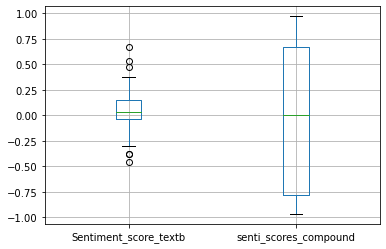

In [135]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Sentiment_score_textb'}>,
        <AxesSubplot:title={'center':'senti_scores_compound'}>]],
      dtype=object)

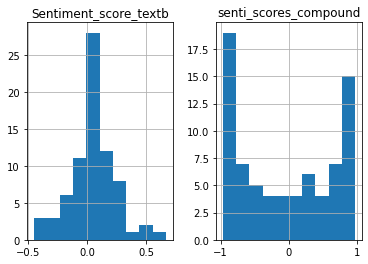

In [136]:
df.hist()